<a href="https://colab.research.google.com/github/NiallSmith93/ET5003/blob/main/ET5003_KaggleCompetition_NiallSmith_20174578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [4]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [6]:
!pip install gpy

     |████████████████████████████████| 959 kB 6.7 MB/s 
     |████████████████████████████████| 71 kB 10.8 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565087 sha256=19a90f6642eb936fa84fc630ffbb8c6c59d6c2c9fbea6b0bcc262bd9344f9fac
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=a6a26b6e886ad396373cfa3b213ef1f323b177767cc6c51d16e2a16d165b10ab
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [7]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [8]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# path to your (local/cloud) drive 
path = '/content/drive/MyDrive/Colab Notebooks/data/kaggle/'

# load dataset
df_train = pd.read_csv(path+'HousePrice_Train.csv', encoding='latin-1')
df_test = pd.read_csv(path+'HousePrice_Test.csv', encoding='latin-1')
df_submission = pd.read_csv(path+'sample_submission.csv', encoding='latin-1')

print('df_train shape:', df_train.shape)
print('df_test shape:', df_test.shape)
print('df_submission shape:', df_submission.shape)

df_train shape: (1638, 14)
df_test shape: (702, 13)
df_submission shape: (702, 2)


### Train dataset

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


### Test dataset

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   ID             702 non-null    int64  
 2   Location       702 non-null    object 
 3   Num_Bathrooms  702 non-null    int64  
 4   Num_Beds       702 non-null    int64  
 5   BER_class      594 non-null    object 
 6   Description    702 non-null    object 
 7   Services       246 non-null    object 
 8   Features       702 non-null    object 
 9   Latitude       702 non-null    float64
 10  Longitude      702 non-null    float64
 11  Type           702 non-null    object 
 12  Surface        702 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 71.4+ KB


### Expected Cost dataset

In [13]:
df_submission.head()

,Index,Price
0,1639,833504.0
1,1640,3810763.0
2,1641,3872037.0
3,1642,4286600.0
4,1643,3039875.0


# EDA and cleaning

In [14]:
## Setting index to index

df_train = df_train.set_index('Index')
df_test = df_test.set_index('Index')

## Dropping ID column

df_train = df_train.drop(columns=['ID'])
df_test = df_test.drop(columns=['ID'])

# Setting 'None' in 'Features' to NaN

mask = df_train.loc[:,'Features'] == 'None'
df_train.loc[mask, ['Features']] = np.nan

mask = df_test.loc[:,'Features'] == 'None'
df_test.loc[mask, ['Features']] = np.nan

df_train.isna().sum()

Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features          516
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [15]:
## Encdoing BER_class as ordinal

df_train['BER_class'] = df_train['BER_class'].replace('SINo666of2006exempt', np.nan)
df_test['BER_class'] = df_test['BER_class'].replace('SINo666of2006exempt', np.nan)


ber_map = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
}
df_train['BER_class'] = df_train['BER_class'].replace(ber_map)
df_train['BER_class'] = df_train['BER_class'].fillna(10)

df_test['BER_class'] = df_test['BER_class'].replace(ber_map)
df_test['BER_class'] = df_test['BER_class'].fillna(10)

,Price
Type,
studio,242500.0
apartment,330248.8
duplex,346545.5
end-of-terrace,465252.1
townhouse,477500.0
terraced,492578.8
semi-detached,537824.2
bungalow,560808.3
site,750000.0


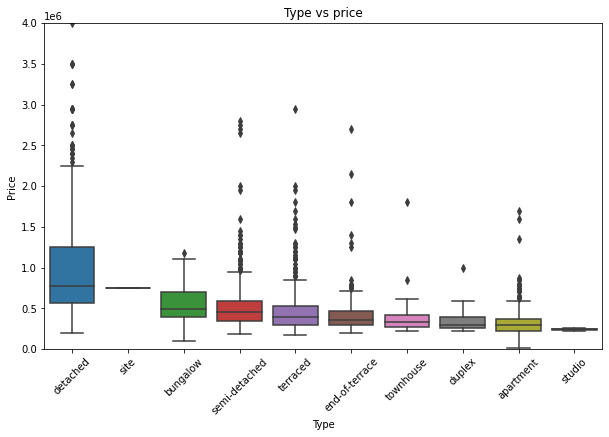

In [16]:
## Groupby of Type & Price
import seaborn as sns
df_train[['Price', 'Type']].groupby(['Type']).mean().round(1).sort_values(by='Price')
plt.figure(figsize=(10,6))
plt.title('Type vs price')
my_order = df_train[['Price', 'Type']].groupby(['Type']).median().sort_values(by='Price').iloc[::-1].index
sns.boxplot(x=df_train['Type'], y=df_train['Price'], order=my_order)
plt.xticks(rotation=45)
plt.ylim([0,4000000])
df_train[['Price', 'Type']].groupby(['Type']).mean().round(1).sort_values(by='Price')

In [17]:
## Type contains important information but cannot be easily encoded so will use one hot encoding
df_train = df_train.join(pd.get_dummies(df_train['Type']))
df_train = df_train.drop(columns=['Type'])

df_test = df_test.join(pd.get_dummies(df_test['Type']))
df_test = df_test.drop(columns=['Type'])

df_train.head()

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
Index,,,,,,,,,,,,,,,,,,,,,
1,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,NaN,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0
2,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0
3,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0
4,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0
5,Lusk,3,4,10.0,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,510000,0,0,1,0,0,0,0,0,0,0


In [18]:
# Setting 'None' in 'Features' to NaN
mask = df_train.loc[:,'Features'] == 'None'
df_train.loc[mask, ['Features']] = np.nan
mask = df_test.loc[:,'Features'] == 'None'
df_test.loc[mask, ['Features']] = np.nan
df_train.isna().sum()

Location             0
Num_Bathrooms        0
Num_Beds             0
BER_class            0
Description          0
Services          1061
Features           516
Latitude             0
Longitude            0
Surface              0
Price                0
apartment            0
bungalow             0
detached             0
duplex               0
end-of-terrace       0
semi-detached        0
site                 0
studio               0
terraced             0
townhouse            0
dtype: int64

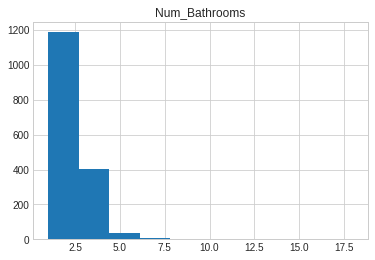

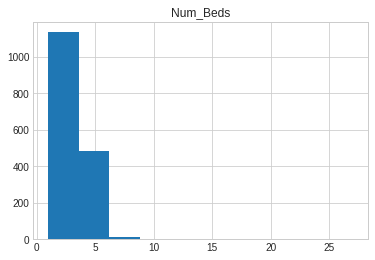

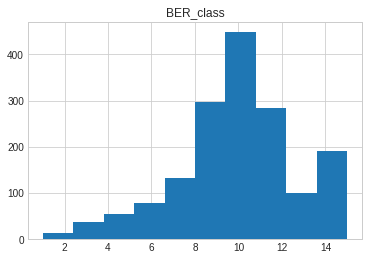

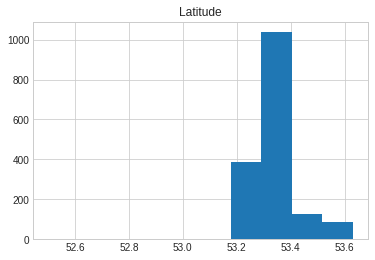

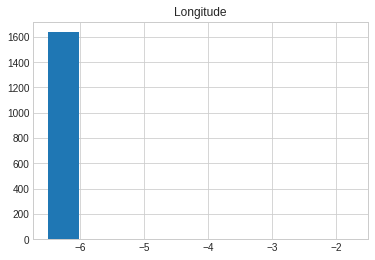

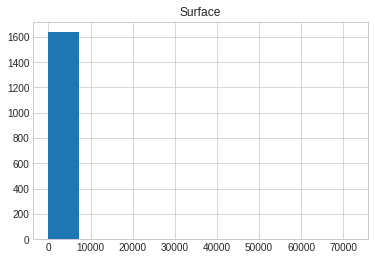

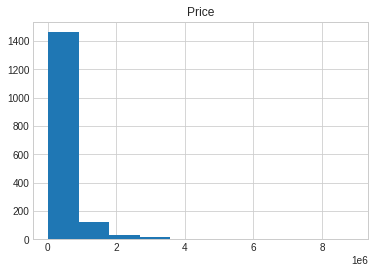

In [19]:
## Plotting distributions of numerical features
plt.style.use('seaborn-whitegrid')
for c in ['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude', 'Surface', 'Price']:
  plt.hist(df_train[c])
  plt.title(c)
  plt.show()

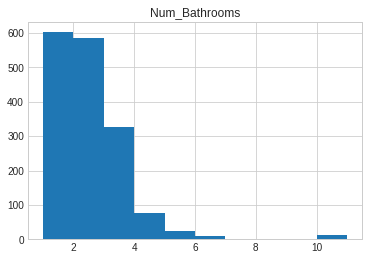

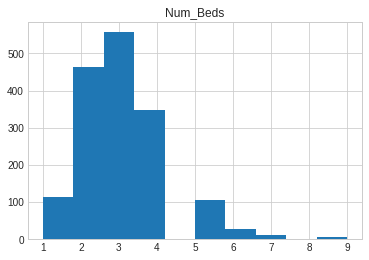

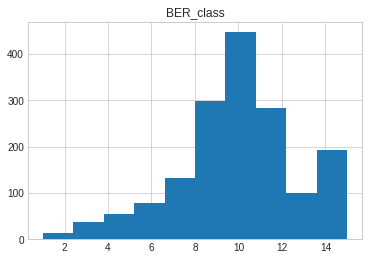

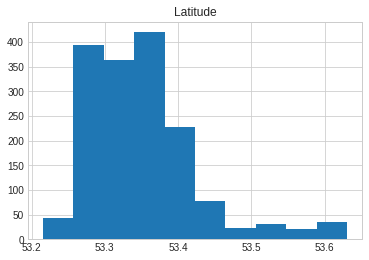

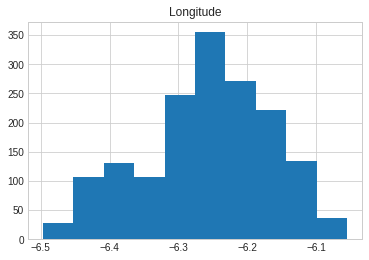

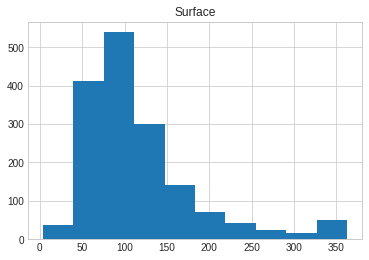

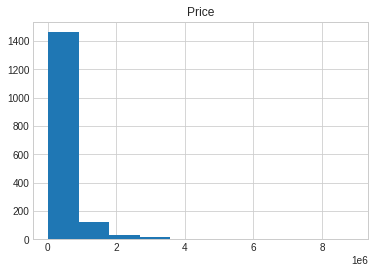

In [20]:
## Treating outliers - capping based on EDA
df_train['Num_Bathrooms'].values[df_train['Num_Bathrooms'] >= 7] = 11
df_train['Num_Beds'].values[df_train['Num_Beds'] >= 9] = 9
df_train['Surface'].values[df_train['Surface'] >= 363] = 363

df_test['Num_Bathrooms'].values[df_test['Num_Bathrooms'] >= 7] = 11
df_test['Num_Beds'].values[df_test['Num_Beds'] >= 9] = 9
df_test['Surface'].values[df_test['Surface'] >= 363] = 363

## Treating outliers - dropping rows with incorrect lat lon
df_train = df_train.drop(df_train[df_train['Latitude'] < 52].index)
df_train = df_train.drop(df_train[df_train['Longitude'] > -4].index)

df_test['Num_Bathrooms'].values[df_test['Num_Bathrooms'] >= 7] = 11
df_test['Num_Beds'].values[df_test['Num_Beds'] >= 9] = 9
df_test['Surface'].values[df_test['Surface'] >= 363] = 363

## Replotting distributions of numerical features
for c in ['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude', 'Surface', 'Price']:
  plt.hist(df_train[c])
  plt.title(c)
  plt.show()

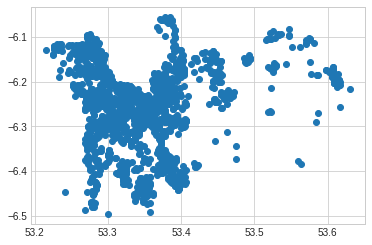

In [21]:
plt.scatter(df_train['Latitude'], df_train['Longitude'])

In [22]:
## Log transform target
df_train['Price'] = np.log(df_train['Price'])
df_train.head(4)

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse
Index,,,,,,,,,,,,,,,,,,,,,
1,Ongar,2,2,9.0,DNG are delighted to present to the market no....,NaN,NaN,53.396659,-6.438791,67.00,12.180755,1,0,0,0,0,0,0,0,0,0
2,North Strand,1,2,10.0,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,12.959844,0,0,0,0,0,0,0,0,1,0
3,Stepaside,3,3,3.0,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,13.190022,0,0,0,0,0,1,0,0,0,0
4,Cabinteely,1,3,12.0,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,13.120361,0,0,1,0,0,0,0,0,0,0


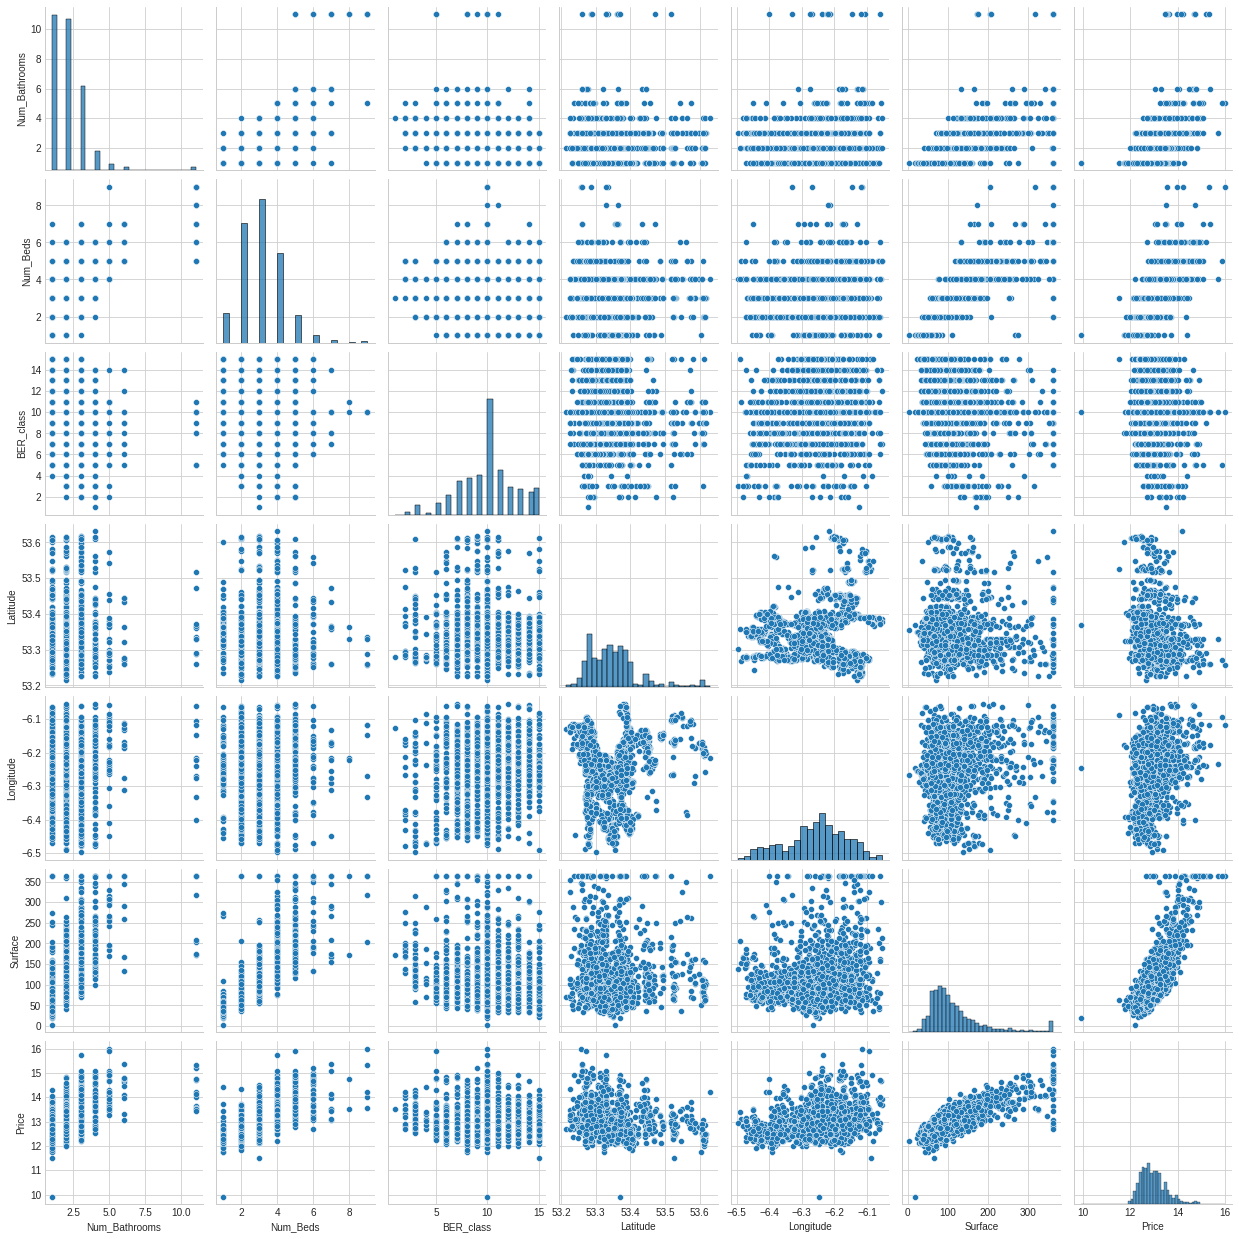

In [23]:
import seaborn as sns
sns.pairplot(df_train[['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude', 'Surface', 'Price']])

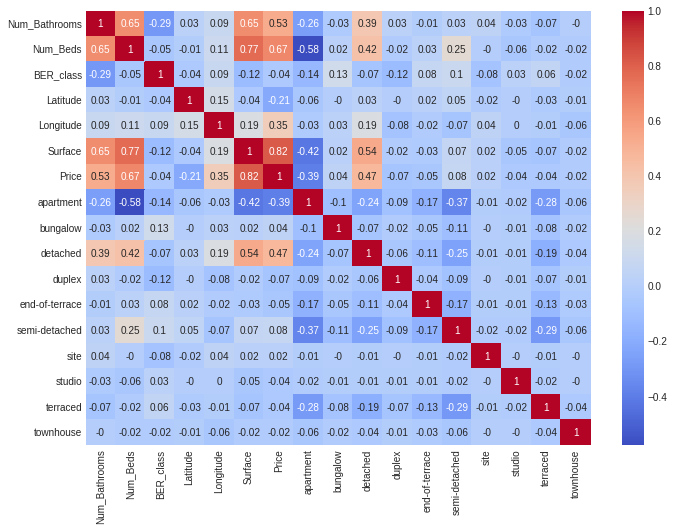

In [24]:
corr = df_train.corr()
plt.figure(figsize=(8*1.4142,8))
sns.heatmap(round(corr,2), annot=True, cmap='coolwarm')

# Baseline model



In [25]:
X = df_train[['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Surface',
       'apartment', 'bungalow', 'detached', 'duplex', 'end-of-terrace',
       'semi-detached', 'site', 'terraced', 'townhouse']]

X_ = df_test[['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Surface',
       'apartment', 'bungalow', 'detached', 'duplex', 'end-of-terrace',
       'semi-detached', 'site', 'terraced', 'townhouse']]

y = df_train["Price"]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_ = scaler.fit_transform(X_)
y = scaler.fit_transform(y.values.reshape(-1,1))

print(X.shape)
print(X_.shape)
print(y.shape)

(1637, 13)
(702, 13)
(1637, 1)


Baseline linear regression score: 0.6789166095827843


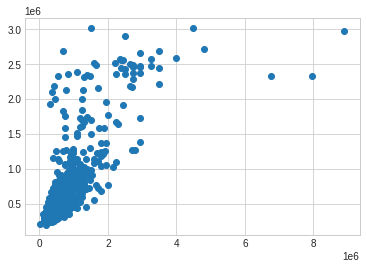

In [26]:
#### Baseline model of a simple linear regression with only
## numeric features
## no geographical features
## outliers capped
## target log transformed
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

lr = linear_model.LinearRegression().fit(X, y)
print('Baseline linear regression score:', lr.score(X, y))

y_pred = lr.predict(X)
y_pred = np.exp(scaler.inverse_transform(y_pred))
y = np.exp(scaler.inverse_transform(y))
plt.scatter(y, y_pred)

In [27]:
## Baseline error
from sklearn.metrics import mean_absolute_error
print('Baseline linear regression MAE: ', round(mean_absolute_error(y, y_pred)))

Baseline linear regression MAE:  158582


In [32]:
# Sample submission
from google.colab import files
y_pred_ = lr.predict(X_)
y_pred_ = np.exp(scaler.inverse_transform(y_pred_))
df_test['Price'] = y_pred_
baseline_submission = pd.DataFrame(df_test['Price'])
baseline_submission['Index'] = baseline_submission.index
baseline_submission = baseline_submission[['Index', 'Price']]
baseline_submission = baseline_submission.reset_index(drop=True)
baseline_submission.to_csv('sample_submission_.csv')
#files.download('sample_submission_.csv')
baseline_submission


,Index,Price
0,1639,289318.700861
1,1640,581267.879644
2,1641,375490.046138
3,1642,809571.189812
4,1643,411143.659100
...,...,...
697,2336,257364.425034
698,2337,298376.144664
699,2338,380104.998066
700,2339,452754.746186


# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

In [58]:
#### NLP cleaning

## Stemmer
stemmer = SnowballStemmer('english', ignore_stopwords=False)
# Stopword library
nltk.download('stopwords')
stop = set(stopwords.words('english'))

# Function to take a dataframe column and extract all words into a list (bag of words)
def extract(col):
  col_words = []
  # remove anything not a letter
  col_entries = [re.sub('[^a-zA-Z]', ' ', entry) for entry in col]
  for i in range(len(col_entries)):
    entry = col[i]
    # removing duplicate spaces
    entry = " ".join(entry.split())
    entry_words = entry.split()
    for j in entry_words:
      col_words.append(j)
  return col_words

# function to normalize words in a list of words
def normalize(words):
  normalized_words = list()
  for word in words:
    # remove  the most common words
    if word.lower() not in stop: 
      # stemming
      #new_word = stemmer.stem(word) 
      # lower case
      normalized_words.append(word.lower()) 
  return normalized_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [59]:
# remove anything that is not a letter in the emails
df_train['Description'] = [re.sub('[^a-zA-Z]', ' ', entry) for entry in df_train['Description']]

# list of words in the emails
# entry_words is a nested list (entries > words)
entry_words = [entry.split() for entry in df_train['Description']]

print('length of entry_words, i.e. number of ads:', len(entry_words))
print('length of entry_words first entry, i.e. number of words in first ad:', len(entry_words[0]))
print('length of entry_words first entry first word, i.e. number of characters in first word of first ad:', len(entry_words[0][0]))

entry_words_norm = [normalize(entry) for entry in entry_words]

print('length of entry_words_norm, i.e. number of ads:', len(entry_words_norm))
print('length of entry_words_norm first entry, i.e. number of words in first ad:', len(entry_words_norm[0]))
print('length of entry_words_norm first entry first word, i.e. number of characters in first word of first ad:', len(entry_words_norm[0][0]))

# update dataframe
df_train['Description_pp'] = [" ".join(entry) for entry in entry_words_norm]
df_train.head()

length of entry_words, i.e. number of ads: 1637
length of entry_words first entry, i.e. number of words in first ad: 267
length of entry_words first entry first word, i.e. number of characters in first word of first ad: 3
length of entry_words_norm, i.e. number of ads: 1637
length of entry_words_norm first entry, i.e. number of words in first ad: 190
length of entry_words_norm first entry first word, i.e. number of characters in first word of first ad: 3


,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,apartment,bungalow,detached,duplex,end-of-terrace,semi-detached,site,studio,terraced,townhouse,Description_pp
Index,,,,,,,,,,,,,,,,,,,,,,
1,Ongar,2,2,9.0,DNG are delighted to present to the market no ...,NaN,NaN,53.396659,-6.438791,67.00,12.180755,1,0,0,0,0,0,0,0,0,0,dng delighted present market chipping row two ...
2,North Strand,1,2,10.0,Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,12.959844,0,0,0,0,0,0,0,0,1,0,northbrook terrace charming red brick period h...
3,Stepaside,3,3,3.0,Welcome to No Cotter Close an immaculately...,NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,13.190022,0,0,0,0,0,1,0,0,0,0,welcome cotter close immaculately presented th...
4,Cabinteely,1,3,12.0,Welcome to Sycamore Walk Enjoying a premi...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,13.120361,0,0,1,0,0,0,0,0,0,0,welcome sycamore walk enjoying premier address...
5,Lusk,3,4,10.0,Four Seasons comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,13.142166,0,0,1,0,0,0,0,0,0,0,four seasons comes market wonderful opportunit...


In [60]:
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def NLP_preprocess(some_text):
  """
  Normalization using NLTK and spaCy
  """
  # 1. Tokenization
  NLP_token = word_tokenize(some_text)

  # 2. Stemming
  #PS = PorterStemmer()
  #NLP_stem = []
  #for word in NLP_token:
   #   NLP_stem.append(PS.stem(word))

  # 3. Lemmatization
  WL = WordNetLemmatizer()
  NLP_lemma = []
  for word in NLP_token:
      NLP_lemma.append(WL.lemmatize(word))
  
  # 4. Stopword   
  FS = []  
  NLP_stop = set(stopwords.words("english"))
  for w in NLP_lemma:  
      if w not in NLP_stop:  
        FS.append(w)
  
  # 5. Punctuation  
  punctuations = "?:!.,;"
  for word in FS:
      if word in punctuations:
          FS.remove(word)

  # print comparison
  print(" ")
  print(some_text)
  print(FS)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [61]:
NLP_preprocess(df_train['Description_pp'][1])

 
dng delighted present market chipping row two bedroom apartment comes market excellent condition throughout viewers sure see meticulous care attention home owner property well presented apartment comprises open plan living dining room kitchen two spacious double bedrooms master benefitting large en suite extensively tiled bathroom property benefits door access designated car parking quiet private location chipping row well serviced excellent public transport links dublin city centre dublin airport n within easy reach local primary secondary schools blanchardstown shopping centre within driving distance ongar village offer including supermarket restaurants shops pharmacy tm short walk away viewing comes highly recommended features ground floor two bedroom apartment sqm sqft built c double glazed windows throughout electric heating door access designated visitor car parking management fee approx management company core accommodation living dining room x laminate flooring feature firepl

In [63]:
for i in df_train['Description_pp']:
  print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
CV = CountVectorizer()
counts = CV.fit_transform(df_train['Description_pp'])
counts.shape

(1637, 9533)

### Exploring text features 'Services' and 'Description'

In [35]:
# Parsing out 'Services'
services_list = [i.split(',') for i in df_train[df_train['Services'].notnull()]['Services']]
#services_list.sort()
sorted(services_list, key=len)[0:20]

[['Parking'],
 ['Gas Fired Central Heating'],
 ['Parking'],
 ['Parking'],
 ['Gas Fired Central Heating'],
 ['Parking'],
 ['Wired for Cable Television'],
 ['Parking'],
 ['Parking'],
 ['Gas Fired Central Heating'],
 ['Parking'],
 ['Parking'],
 ['Parking'],
 ['Parking'],
 ['Gas Fired Central Heating'],
 ['Parking'],
 ['Parking'],
 ['Gas Fired Central Heating'],
 ['Wired for Cable Television'],
 ['Gas Fired Central Heating']]

In [56]:
counter = 0
for i in range(len(services_list)):
  counter += len(services_list[i])

print('Average number of services:', round(counter/len(services_list)))

def longest(l):
  llengths = [len(i) for i in l]
  return max(llengths)

print('Sample with max number of services:', longest(services_list))

Average number of services: 2
Sample with max number of services: 5


In [ ]:
# Exploring length of entried in Description and Features 
lens_desc = []
for row in df_train.iterrows():
  lens_desc.append(len(row))

avg_lens_desc = sum(lens_desc)/len(lens_desc)

lens_feats = []
for row in df_train.iterrows():
  lens_desc.append(len(row))

avg_lens_feats = sum(lens_feats)/len(lens_feats)

print('Min string length in Description:', round(min(lens_desc),1))
print('Mean string length in Features:', round(avg_lens_desc,1))
print('Max string length in Description:', round(max(lens_desc),1))
print('Min string length in Features:', round(min(lens_feats),1))
print('Mean string length in Description:', round(avg_lens_feats,1))
print('Max string length in Features:', round(max(lens_feats),1))

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.